# TP 5  

**Context:** 
We would like to know when news articles on the @celebjets Twitter account were written in 2022.

**Assignment:** 
Write a Python program that takes in scrapped data from Google News and creates a histogram representing the number of articles that were published in a given week. Say week 1: 23 articles, week 2: 3 articles and so on. The code must work with the text file named `news-celebjets.txt` provided on Moodle

**Constraints:** 
Work alone, but use chatGPT as an assistant.

**Deliverables:** 
This Jupyter notebook file that contains the code with a step by step exaplantion of the process that includes mentions CT concepts. Typically we exect that the code is broken into several `code` cells with `markdown` cells in between with detailed explanation. It should also include a paragraph discussin how you made you of chatGPT.

The Jupyter notebook must submitted via Moodle and be named according to the following convention: `YouLastName_YourFirstName.ipynb`

For example John Smith would have to name his notebook: `Smith_John.ipynb`

Good luck with your TP, and happy coding!


My first step was to understand the structure of news-celebjets.txt and identify the useful information it contains.

In [ ]:
with open('news-celebjets.txt') as file:
    text_news_celebjets = file.read()
    

After reviewing the article, I found that the datetime property provides valuable information about the publication date.
Therefore, my initial goal was to collect all values associated with the datetime property. I asked Claude 3.5 Sonnet about the format used.

At this stage, I'm unsure whether to store the data in a list or a dictionary. I'll begin with a list and later determine if a dictionary would be more suitable.

To achieve this, I plan to search the file for all expressions that follow the datetime format, such as "2022-12-14T08:00:00Z". This involves identifying a pattern where the expression starts with "2022", contains the letter "T", and ends with the letter "Z".

I asked the AI assistant how to achieve this regular expression and whether it could also help me convert the matched dates from the format "2022-12-14T08:00:00Z" to "YYYY-MM-DD" once they are found.

In [ ]:
import re

pattern = r"\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}Z"

# Find all matches
matches = re.findall(pattern, text_news_celebjets)
    

# reformat the matches to "YYYY-MM-DD"

dates_to_check = [re.sub(r"T\d{2}:\d{2}:\d{2}Z", "", date) for date in matches]

#Source: Claude 3.5 Sonnet


I originally planned to create a list where each indexed value would act as a key representing a specific week, 
with the corresponding value being an array of seven dates. For example:

weeks = [week_1:['2022-01-01','2022-01-02','2022-01-03','2022-01-04','2022-01-05','2022-01-06','2022-01-07'], 
         week_2:['2022-01-08','2022-01-09','2022-01-10','2022-01-11','2022-01-12','2022-01-13','2022-01-14'], 
        ...]

The goal was to iterate through each value in the dates_to_check list, then loop through the weeks list to find matches. 

When a match was found, I would update another list structured as key-value pairs, like this:

[{'week_1': 0}, {'week_2': 0}, {'week_3': 0}, ...]

However, I think iterating through two separate lists to update a third one would be highly inefficient.


After some thought, I asked the AI assistant if it was possible to convert a formatted date into a numerical 
representation based on its position within the year.

More specifically, given that the year starts on January 1, 2022 (01.01.2022), this date would be assigned the value 1. 
If a date in the list is for instance January 14th, (14.01.2022), it would be converted into a number representing the 14th day of the year.

To determine the corresponding week:

- The day number is divided by 7.
- If the division has no remainder, the quotient represents the week number
- If there is a remainder, add 1 to the quotient to determine the correct week.

With the help of the AI the first function was created, the following function converts the date in a specific number 
for instance 31 of January is converted into 31
    

In [ ]:
from datetime import datetime

# Function to convert date to nth day of the year
def date_to_day_of_year(date_str):
    date = datetime.strptime(date_str, "%Y-%m-%d")  # Convert string to date object
    start_date = datetime(date.year, 1, 1)  # Start of the year
    return (date - start_date).days + 1 

#Source: Claude 3.5 Sonnet


The following function determines the week to which a given date belongs.

In [ ]:
# Function to determine the week based on nth day of the year

def get_week_of_year(nth_day):
    week_number = nth_day // 7  # Floor division to get the basic week
    if nth_day % 7 != 0:
        week_number += 1  # If there's a remainder, we're in the next week
    return week_number

#Source: Claude 3.5 Sonnet



Each value (dates) from dates_to_check list is converted to a week number


In [ ]:

# Convert dates to week numbers
list_weeks = []
for date in dates_to_check:
    nth_day = date_to_day_of_year(date)  # Convert to nth day of the year
    week = get_week_of_year(nth_day)  # Get the week number
    list_weeks.append(week)

#Source: Claude 3.5 Sonnet

result=list_weeks


A dictionary was created to count article occurrences by week, where each key represents a specific week (e.g., 'week_1', 'week_2') and the corresponding value tracks the number of articles published during that week

In [ ]:
articles_per_weeks = {}
for i in range(1, 54):
    articles_per_weeks[f"week_{i}"] = 0


Now we iterate through list_weeks and update the dictionary by incrementing the count for each corresponding week."

In [ ]:
for week in list_weeks:
    week_key = f"week_{week}"
    articles_per_weeks[week_key] += 1  # Direct dictionary access

[{'week_1': 0}, {'week_2': 0}, {'week_3': 0}, {'week_4': 0}, {'week_5': 12}, {'week_6': 0}, {'week_7': 0}, {'week_8': 0}, {'week_9': 0}, {'week_10': 0}, {'week_11': 0}, {'week_12': 0}, {'week_13': 6}, {'week_14': 0}, {'week_15': 0}, {'week_16': 6}, {'week_17': 0}, {'week_18': 0}, {'week_19': 0}, {'week_20': 6}, {'week_21': 6}, {'week_22': 0}, {'week_23': 6}, {'week_24': 0}, {'week_25': 0}, {'week_26': 0}, {'week_27': 0}, {'week_28': 6}, {'week_29': 72}, {'week_30': 46}, {'week_31': 108}, {'week_32': 36}, {'week_33': 18}, {'week_34': 30}, {'week_35': 12}, {'week_36': 6}, {'week_37': 12}, {'week_38': 18}, {'week_39': 0}, {'week_40': 12}, {'week_41': 0}, {'week_42': 6}, {'week_43': 18}, {'week_44': 6}, {'week_45': 6}, {'week_46': 6}, {'week_47': 0}, {'week_48': 6}, {'week_49': 12}, {'week_50': 28}, {'week_51': 30}, {'week_52': 6}, {'week_53': 6}]


The next step is to create a histogram to visualize the distribution of articles per week. This can be achieved using the key-value pairs stored in the articles_per_weeks dictionary. Before generating the histogram, I extracted the keys (week labels) and values (article counts) directly from the dictionary using the .keys() and .values() methods

In [ ]:
weeks_list = list(articles_per_weeks.keys())
frequency_per_week = list(articles_per_weeks.values())

With the assistance of the AI assistant, I generated a histogram. However, since the objective of the task is to display how many articles were published each week, the AI suggested that a bar chart would be more appropriate. While histograms are used to show the distribution of data, bar charts are better suited for representing categories—in this case, weeks.

Therefore, with the AI’s help, I created both visualizations


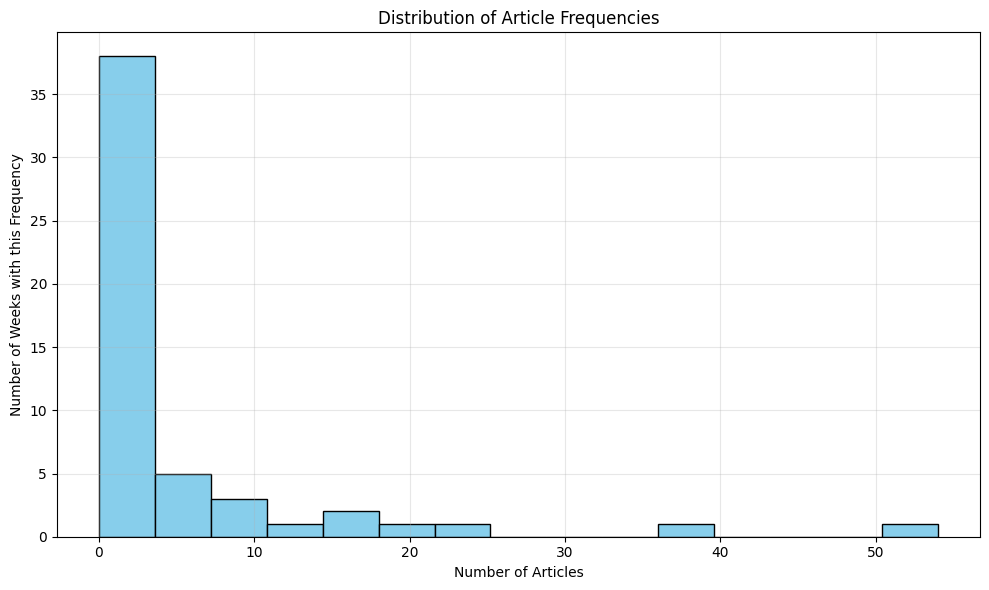

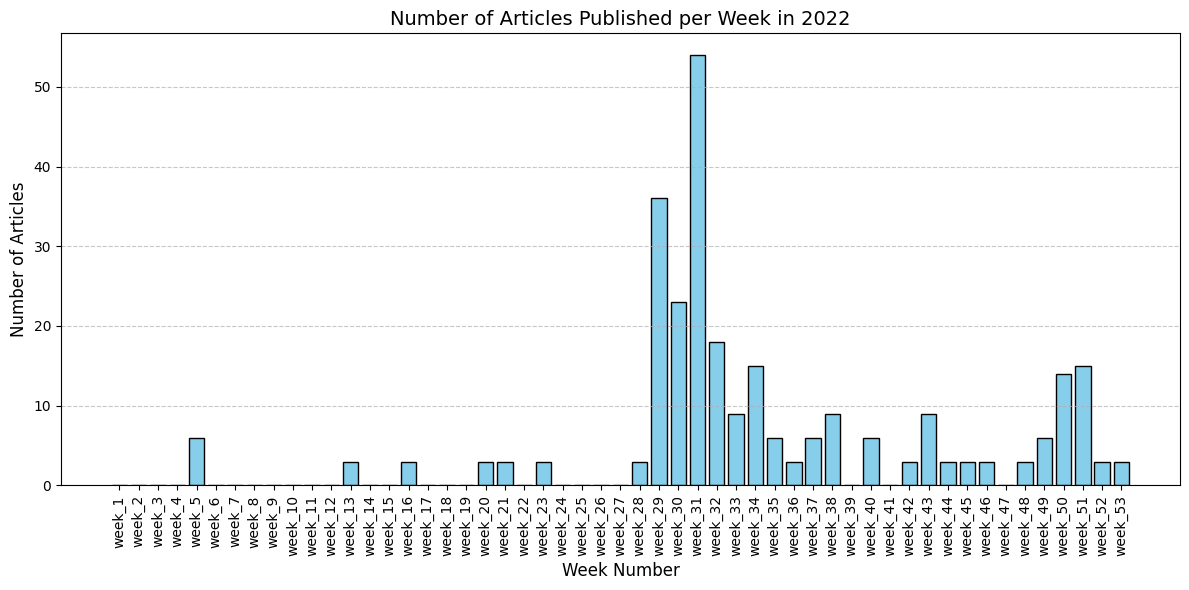

In [ ]:
import matplotlib.pyplot as plt



# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(frequency_per_week, bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Article Frequencies')
plt.xlabel('Number of Articles')
plt.ylabel('Number of Weeks with this Frequency')
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(weeks_list, frequency_per_week, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Number of Articles Published per Week in 2022', fontsize=14)
plt.xlabel('Week Number', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

